In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
data = pd.read_excel(r'data/SimData_Transplant_Ver1.0.xls')

In [3]:
data.head()

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
0,Male,A,home,Male,A,No,268,56.556760,41.002731,33.445563,31.358900,13.967938,14.861206,1770.322146,1
1,Male,A,home,Male,A,Yes,39,60.818110,30.997162,19.928849,22.484298,12.414717,14.542220,1432.093391,1
2,Male,AB,home,Male,A,No,511,51.127335,33.616883,27.273124,24.887090,7.680005,7.684472,815.728909,1
3,Male,B,home,Male,B,No,126,53.782981,39.580918,27.275657,33.181029,20.663905,21.302559,408.557233,1
4,Male,O,icu,Male,O,No,7,78.053001,51.286678,23.349091,28.348204,25.454707,24.021749,4676.209514,1


In [4]:
new_data = data.loc[(data['Bloodtype'] == data['Donor_Bloodtype'])]

In [5]:
new_data.head()

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
0,Male,A,home,Male,A,No,268,56.556760,41.002731,33.445563,31.358900,13.967938,14.861206,1770.322146,1
1,Male,A,home,Male,A,Yes,39,60.818110,30.997162,19.928849,22.484298,12.414717,14.542220,1432.093391,1
3,Male,B,home,Male,B,No,126,53.782981,39.580918,27.275657,33.181029,20.663905,21.302559,408.557233,1
4,Male,O,icu,Male,O,No,7,78.053001,51.286678,23.349091,28.348204,25.454707,24.021749,4676.209514,1
5,Male,O,home,Female,O,No,36,51.661064,18.164311,22.248078,21.681974,21.609381,25.297144,3065.983436,0


In [6]:
new_data['MELD_avg'] = (new_data['MELD']+new_data['MELDNA'])/2

<ipython-input-6-06db8fc796c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['MELD_avg'] = (new_data['MELD']+new_data['MELDNA'])/2


In [7]:
new_data

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens,MELD_avg
0,Male,A,home,Male,A,No,268,56.556760,41.002731,33.445563,31.358900,13.967938,14.861206,1770.322146,1,14.414572
1,Male,A,home,Male,A,Yes,39,60.818110,30.997162,19.928849,22.484298,12.414717,14.542220,1432.093391,1,13.478469
3,Male,B,home,Male,B,No,126,53.782981,39.580918,27.275657,33.181029,20.663905,21.302559,408.557233,1,20.983232
4,Male,O,icu,Male,O,No,7,78.053001,51.286678,23.349091,28.348204,25.454707,24.021749,4676.209514,1,24.738228
5,Male,O,home,Female,O,No,36,51.661064,18.164311,22.248078,21.681974,21.609381,25.297144,3065.983436,0,23.453263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,Male,O,inpt,Male,O,No,477,36.888320,55.057192,33.465910,25.884007,19.071639,17.007024,346.638288,1,18.039332
3994,Male,A,home,Female,A,No,516,47.903678,31.879407,25.593460,28.638115,17.516368,15.286654,1491.754741,1,16.401511
3995,Male,A,home,Female,A,No,179,66.435868,30.960044,24.850272,19.682428,12.620159,9.912282,4658.526132,1,11.266221
3998,Female,O,home,Male,O,No,12,59.653318,36.775017,24.560432,18.579377,22.864374,24.288275,145.425581,0,23.576324


## Clustering Analysis

### Based off Blood Type

In [8]:
new_data.Bloodtype.unique()

array(['A', 'B', 'O', 'AB'], dtype=object)

<AxesSubplot:xlabel='MELD_avg', ylabel='Waittime'>

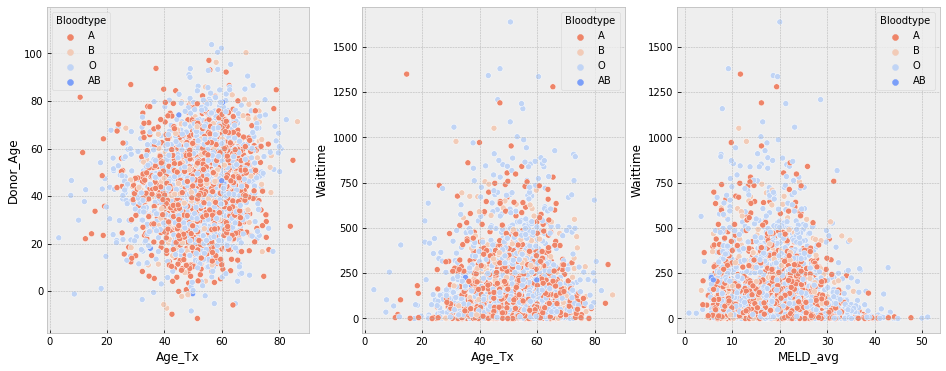

In [9]:
fig, axs = plt.subplots(figsize=(16, 6),ncols=3)
sns.scatterplot(data = new_data, x = "Age_Tx", y = "Donor_Age", hue = new_data.Bloodtype, palette = "coolwarm_r", ax=axs[0])
sns.scatterplot(data = new_data, x = "Age_Tx", y = "Waittime", hue = new_data.Bloodtype, palette = "coolwarm_r", ax=axs[1])
sns.scatterplot(data = new_data, x = "MELD_avg", y = "Waittime", hue = new_data.Bloodtype, palette = "coolwarm_r", ax=axs[2])

<AxesSubplot:xlabel='MELD_avg', ylabel='Waittime'>

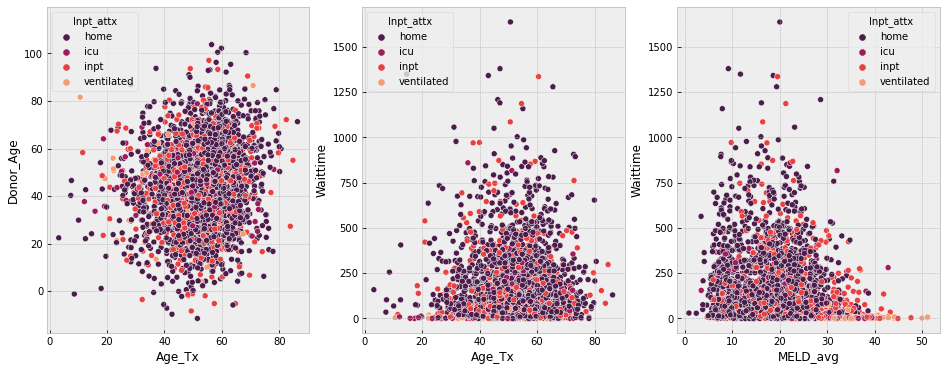

In [10]:
fig, axs = plt.subplots(figsize=(16, 6),ncols=3)
sns.scatterplot(data = new_data, x = "Age_Tx", y = "Donor_Age", hue = new_data.Inpt_attx, palette = "rocket", ax=axs[0])
sns.scatterplot(data = new_data, x = "Age_Tx", y = "Waittime", hue = new_data.Inpt_attx, palette = "rocket", ax=axs[1])
sns.scatterplot(data = new_data, x = "MELD_avg", y = "Waittime", hue = new_data.Inpt_attx, palette = "rocket", ax=axs[2])

### Dimension Reduction & Cluster visualisation

In [11]:
data.columns

Index(['Gender', 'Bloodtype', 'Inpt_attx', 'Donor_Sex', 'Donor_Bloodtype',
       'Donor_DCD', 'Waittime', 'Age_Tx', 'Donor_Age', 'TransplantBMI',
       'Donor_BMI', 'MELD', 'MELDNA', 'Time', 'Cens'],
      dtype='object')

In [12]:
bldD = data[['Bloodtype','Waittime','Age_Tx','Donor_Age','TransplantBMI','Donor_BMI','MELD','Time']].copy()

In [13]:
bldD.head()

,Bloodtype,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,Time
0,A,268,56.556760,41.002731,33.445563,31.358900,13.967938,1770.322146
1,A,39,60.818110,30.997162,19.928849,22.484298,12.414717,1432.093391
2,AB,511,51.127335,33.616883,27.273124,24.887090,7.680005,815.728909
3,B,126,53.782981,39.580918,27.275657,33.181029,20.663905,408.557233
4,O,7,78.053001,51.286678,23.349091,28.348204,25.454707,4676.209514


In [14]:
#Check for basic desp stats for bloodtype

print(bldD.dtypes, '\n')
print(bldD.Bloodtype.value_counts(), '\n')
print(bldD.isna().sum(), '\n') #no NA
print(bldD.isnull().sum()) #no NULL

Bloodtype         object
Waittime           int64
Age_Tx           float64
Donor_Age        float64
TransplantBMI    float64
Donor_BMI        float64
MELD             float64
Time             float64
dtype: object 

O     1642
A     1611
B      554
AB     193
Name: Bloodtype, dtype: int64 

Bloodtype        0
Waittime         0
Age_Tx           0
Donor_Age        0
TransplantBMI    0
Donor_BMI        0
MELD             0
Time             0
dtype: int64 

Bloodtype        0
Waittime         0
Age_Tx           0
Donor_Age        0
TransplantBMI    0
Donor_BMI        0
MELD             0
Time             0
dtype: int64


In [15]:
bldD_num = bldD.drop(['Bloodtype'], axis = 1)

In [16]:
bldD['INPT'] = data['Inpt_attx']
bldD['Cens'] = data['Cens']

### Principle Component Analysis

In [17]:
from sklearn.preprocessing import StandardScaler

features = ['Waittime','Age_Tx','Donor_Age','TransplantBMI','Donor_BMI','MELD','Time']
nums = bldD_num.loc[:, features].values
#scaled_num = StandardScaler().fit_transform(nums)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(nums)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [19]:
principalComponents

array([[ -604.87439806,   113.22512078],
       [ -942.61524799,  -116.48523765],
       [-1559.9827725 ,   354.21255668],
       ...,
       [-2067.56132475,    -5.05213436],
       [-2229.22137977,  -146.31312929],
       [ 1376.5995025 ,  -130.54727457]])

In [20]:
bldD['pc1'] = principalComponents[:,0]
bldD['pc2'] = principalComponents[:,1]

## Non-Scaled PCA on 2D

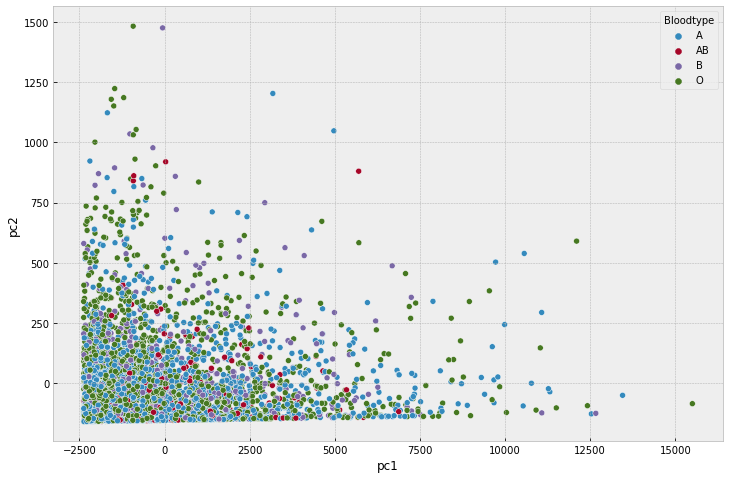

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pc1", y="pc2", hue = 'Bloodtype',data=bldD)
plt.show()

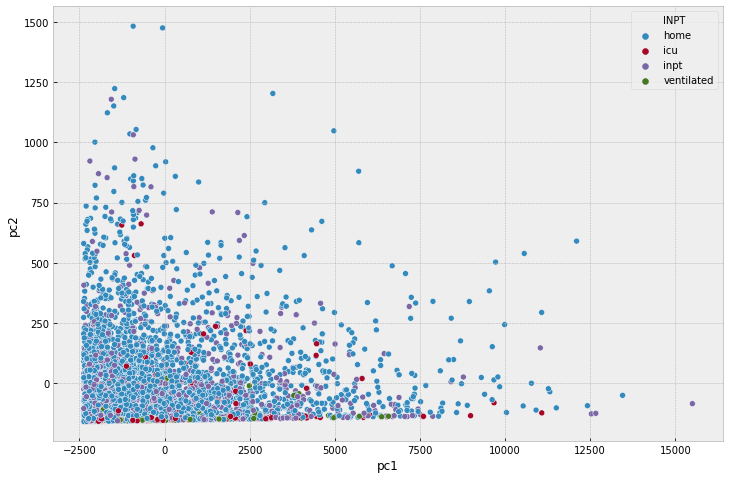

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pc1", y="pc2", hue = 'INPT',data=bldD)
plt.show()

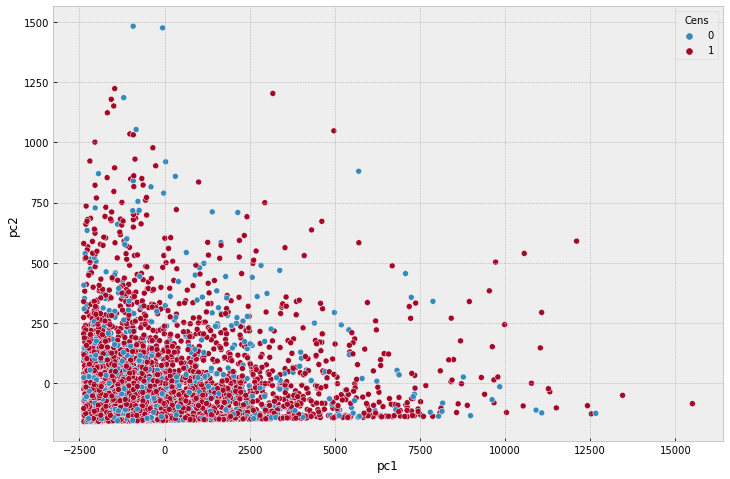

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pc1", y="pc2", hue = 'Cens',data=bldD)
plt.show()

## Scaled PCA on 2D

In [24]:
scaled_num = StandardScaler().fit_transform(nums)
principalComponents_scaled = pca.fit_transform(scaled_num)
bldD['pc1'] = principalComponents_scaled[:,0]
bldD['pc2'] = principalComponents_scaled[:,1]

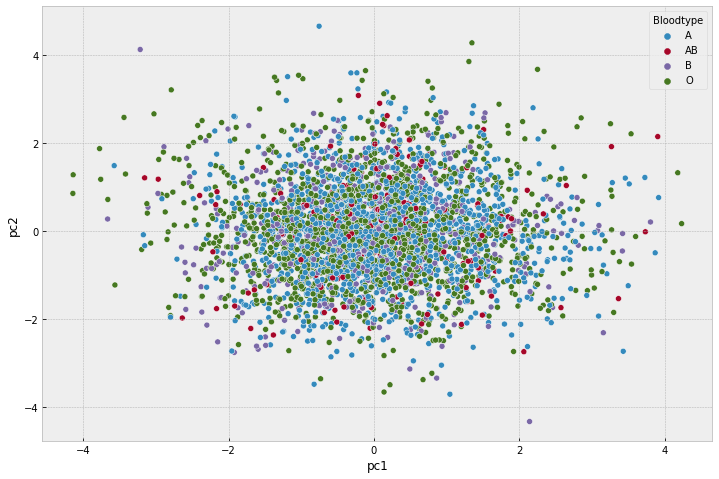

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pc1", y="pc2", hue = 'Bloodtype',data=bldD)
plt.show()

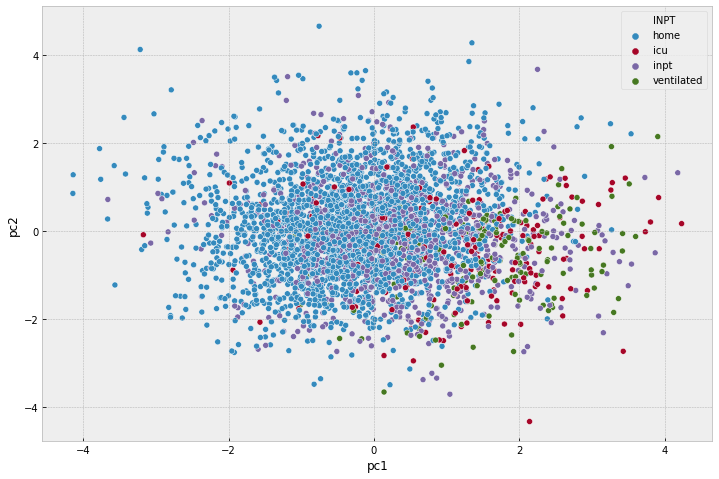

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pc1", y="pc2", hue = 'INPT',data=bldD)
plt.show()

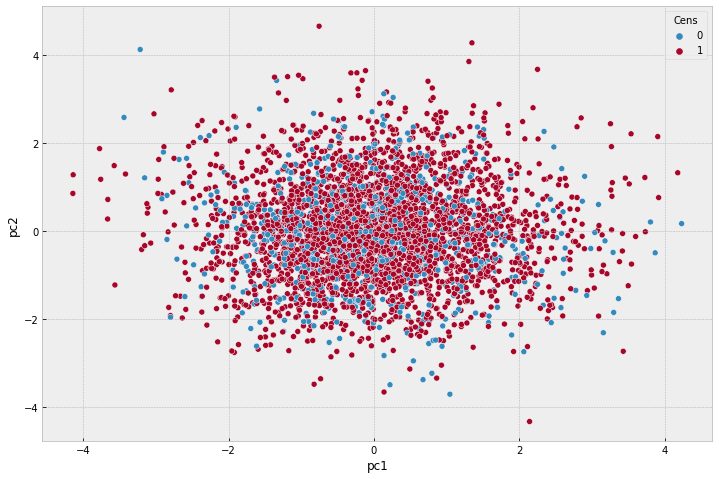

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pc1", y="pc2", hue = 'Cens',data=bldD)
plt.show()

### tSNE

In [28]:
bldD_num = bldD.drop(['Bloodtype','INPT','Cens','pc1','pc2'], axis = 1)

In [29]:
bldD_num.shape

(4000, 7)

In [30]:
from sklearn.manifold import TSNE

In [31]:
m = TSNE(learning_rate= 25)

In [46]:
bldD

,Bloodtype,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,Time,INPT,Cens,pc1,pc2,x,y,x_scaled,y_scaled
0,A,268,56.556760,41.002731,33.445563,31.358900,13.967938,1770.322146,home,1,-0.543196,1.731807,-29.941221,-11.826974,-31.760803,-2.968242
1,A,39,60.818110,30.997162,19.928849,22.484298,12.414717,1432.093391,home,1,-0.848760,-1.313818,-44.514454,3.751608,31.327293,-27.065250
2,AB,511,51.127335,33.616883,27.273124,24.887090,7.680005,815.728909,home,1,-1.740956,0.758071,-12.828147,25.938307,-38.970932,-21.576004
3,B,126,53.782981,39.580918,27.275657,33.181029,20.663905,408.557233,home,1,0.283138,0.909003,13.121661,33.105473,-19.643038,2.991509
4,O,7,78.053001,51.286678,23.349091,28.348204,25.454707,4676.209514,icu,1,-0.267164,-0.860001,17.320017,-20.431374,43.809677,-14.764876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,A,179,66.435868,30.960044,24.850272,19.682428,12.620159,4658.526132,home,1,-1.188629,-0.983980,21.421099,-20.428471,42.628834,-5.936848
3996,O,25,52.845865,71.273963,29.179275,32.437191,29.698726,505.425267,inpt,1,0.867767,0.336881,10.235503,43.527870,-31.465334,23.626177
3997,A,153,34.176371,28.217301,33.598114,23.537730,27.098878,307.379955,inpt,1,1.439230,0.521856,7.718596,22.358812,-12.880485,29.843973
3998,O,12,59.653318,36.775017,24.560432,18.579377,22.864374,145.425581,home,0,-0.216720,-1.575072,16.683891,8.770903,5.437700,0.758700


In [32]:
bldD_num

,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,Time
0,268,56.556760,41.002731,33.445563,31.358900,13.967938,1770.322146
1,39,60.818110,30.997162,19.928849,22.484298,12.414717,1432.093391
2,511,51.127335,33.616883,27.273124,24.887090,7.680005,815.728909
3,126,53.782981,39.580918,27.275657,33.181029,20.663905,408.557233
4,7,78.053001,51.286678,23.349091,28.348204,25.454707,4676.209514
...,...,...,...,...,...,...,...
3995,179,66.435868,30.960044,24.850272,19.682428,12.620159,4658.526132
3996,25,52.845865,71.273963,29.179275,32.437191,29.698726,505.425267
3997,153,34.176371,28.217301,33.598114,23.537730,27.098878,307.379955
3998,12,59.653318,36.775017,24.560432,18.579377,22.864374,145.425581


In [33]:
tsne_features = m.fit_transform(bldD_num)

In [34]:
bldD['x'] = tsne_features[:,0]
bldD['y'] = tsne_features[:,1]

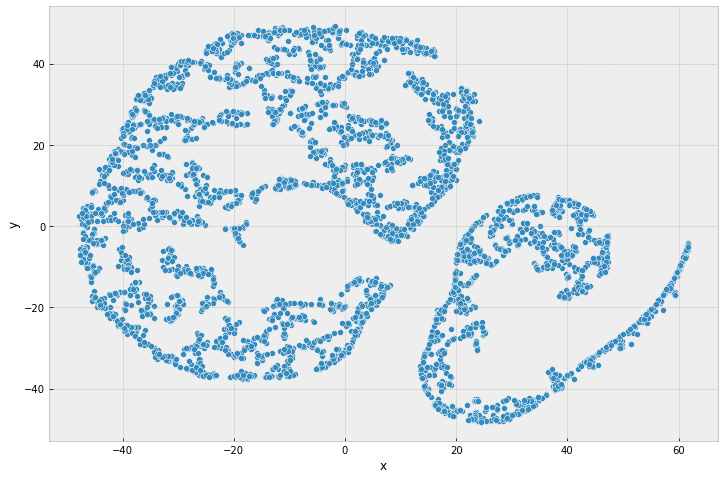

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y", data=bldD)
plt.show()

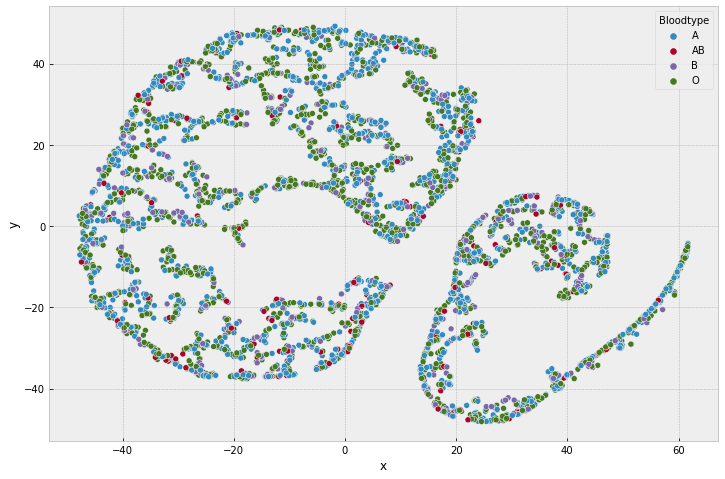

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y",hue = "Bloodtype", data=bldD)
plt.show()

In [37]:
bldD.INPT.value_counts()

home          2749
inpt           901
icu            197
ventilated     153
Name: INPT, dtype: int64

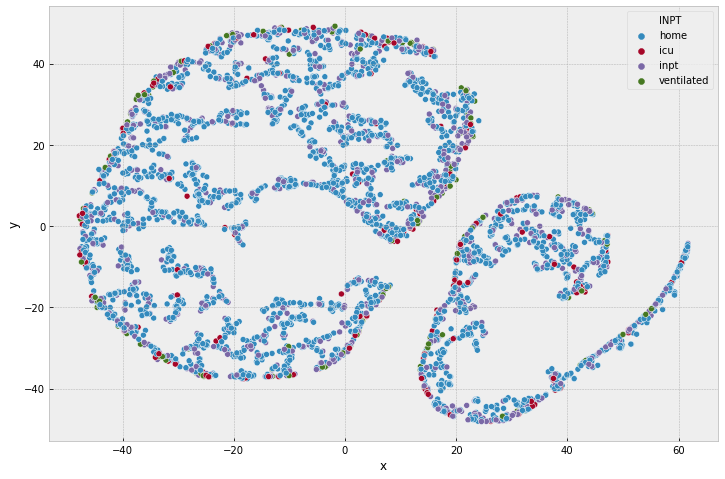

In [38]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y",hue = "INPT", data=bldD)
plt.show()

In [39]:
bldD.Cens.value_counts()

1    3146
0     854
Name: Cens, dtype: int64

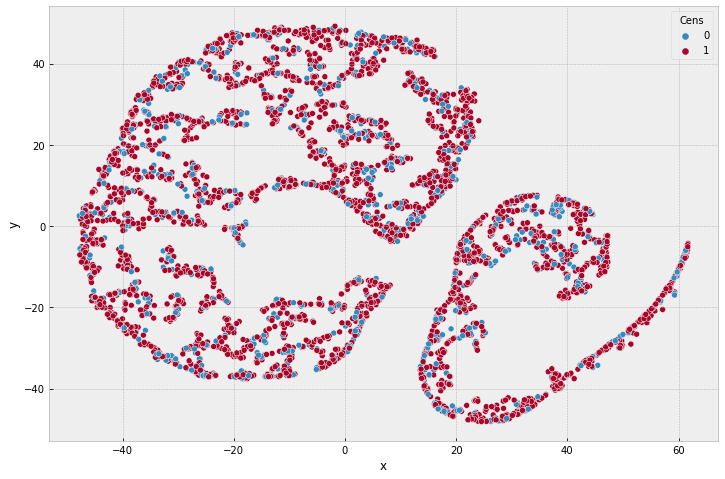

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y",hue = "Cens", data=bldD)
plt.show()

## Scaled tSNE

In [41]:
tsne_features_scaled = m.fit_transform(scaled_num)

In [42]:
bldD['x_scaled'] = tsne_features_scaled[:,0]
bldD['y_scaled'] = tsne_features_scaled[:,1]

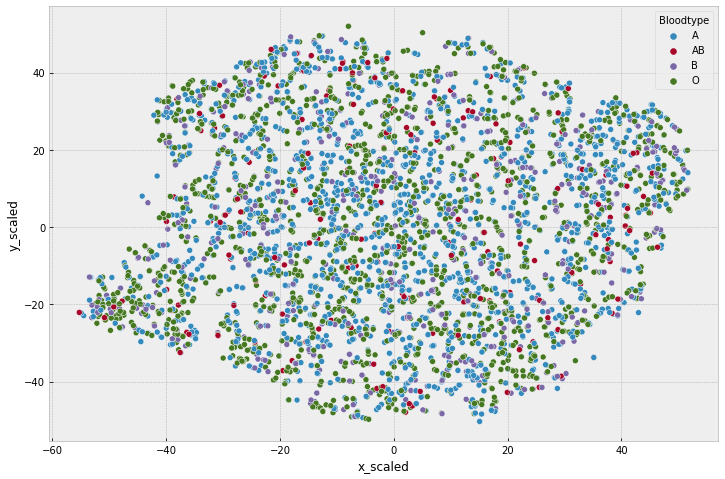

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x_scaled", y="y_scaled",hue = "Bloodtype", data=bldD)
plt.show()

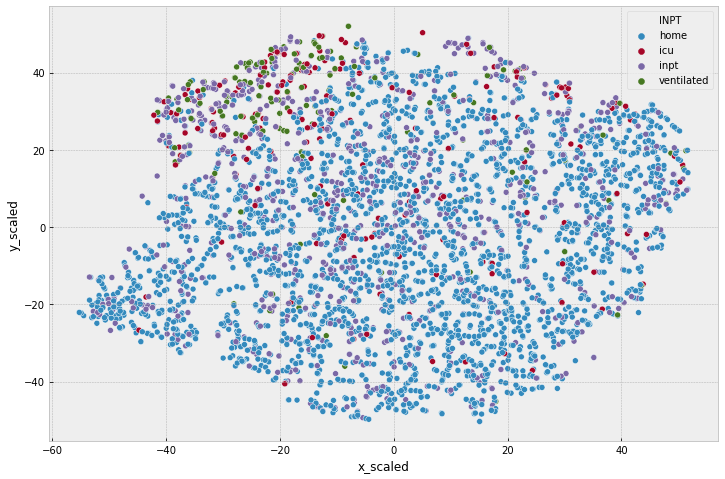

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x_scaled", y="y_scaled",hue = "INPT", data=bldD)
plt.show()

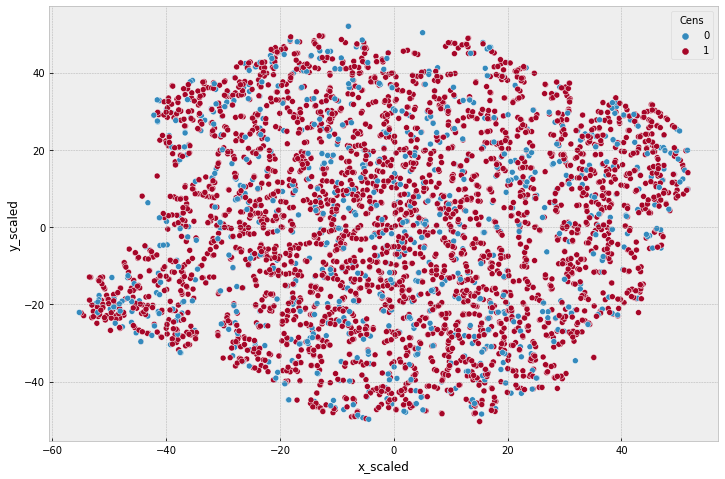

In [45]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x_scaled", y="y_scaled",hue = "Cens", data=bldD)
plt.show()